# gradient boosing,imbalance data

# imbalance data 
* Imbalanced data means your dataset has unequal distribution of classes (target variable categories). For example:

* Binary Classification → 95% samples belong to class 0, only 5% to class 1.

* Multi-class Classification → some classes have thousands of samples, others only a few.

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

In [16]:
df=pd.read_csv(r"C:\Users\Sarvadnya\FUSIONCLASS\machine_learning\Customer-Churn-Records.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [17]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [18]:
df=pd.get_dummies(data=df,columns=['Geography','Gender','Card Type'],dtype=int)
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,...,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,619,42,2,0.00,1,1,1,101348.88,1,1,...,464,1,0,0,1,0,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,...,456,0,0,1,1,0,1,0,0,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,...,377,1,0,0,1,0,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,...,350,1,0,0,1,0,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,...,425,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,...,300,1,0,0,0,1,1,0,0,0
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,...,771,1,0,0,0,1,0,0,1,0
9997,709,36,7,0.00,1,0,1,42085.58,1,1,...,564,1,0,0,1,0,0,0,0,1
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,...,339,0,1,0,0,1,0,1,0,0


In [19]:
x=df.drop(columns=['Exited'])
y=df['Exited']

In [20]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=1)

In [21]:
def modelbuilding(model):
    model.fit(xtrain,ytrain)
    yp=model.predict(xtest)
    print(f'training accuracy: {model.score(xtrain ,ytrain) }')
    print(f'testing data:{model.score(xtest,ytest)}')
    print(classification_report(ytest,yp))

In [22]:
modelbuilding(LogisticRegression())

training accuracy: 0.8472
testing data:0.8528
              precision    recall  f1-score   support

           0       0.86      0.98      0.91      1980
           1       0.81      0.38      0.52       520

    accuracy                           0.85      2500
   macro avg       0.83      0.68      0.72      2500
weighted avg       0.85      0.85      0.83      2500



In [23]:
modelbuilding(DecisionTreeClassifier())

training accuracy: 1.0
testing data:0.9968
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1980
           1       0.99      0.99      0.99       520

    accuracy                           1.00      2500
   macro avg       1.00      1.00      1.00      2500
weighted avg       1.00      1.00      1.00      2500



In [24]:
df.shape

(10000, 21)

<Axes: xlabel='Exited', ylabel='count'>

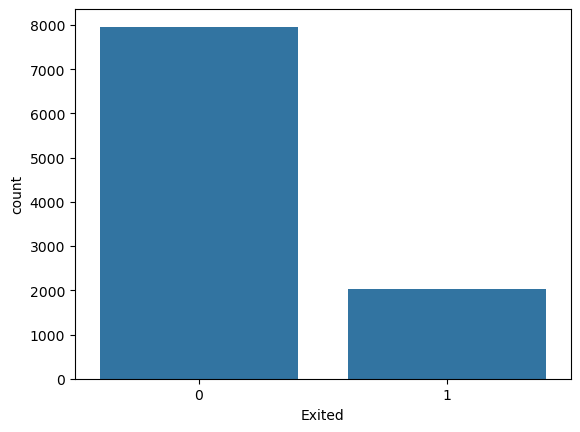

In [25]:
sns.countplot(x=df['Exited']) #dataset imbalence as there

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE,ADASYN
from collections import Counter

In [27]:
df['Exited'].value_counts()

Exited
0    7962
1    2038
Name: count, dtype: int64

In [28]:
y.value_counts()

Exited
0    7962
1    2038
Name: count, dtype: int64

# SMOTE

In [29]:
smote=SMOTE(random_state=0)
x_smote,y_smote=smote.fit_resample(x,y)

In [30]:
x_smote

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,619,42,2,0.000000,1,1,1,101348.880000,1,2,464,1,0,0,1,0,1,0,0,0
1,608,41,1,83807.860000,1,0,1,112542.580000,1,3,456,0,0,1,1,0,1,0,0,0
2,502,42,8,159660.800000,3,1,0,113931.570000,1,3,377,1,0,0,1,0,1,0,0,0
3,699,39,1,0.000000,2,0,0,93826.630000,0,5,350,1,0,0,1,0,0,1,0,0
4,850,43,2,125510.820000,1,1,1,79084.100000,0,5,425,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15919,643,50,6,109321.420237,1,0,0,184205.622400,1,4,631,1,0,0,0,0,0,0,0,0
15920,636,39,9,67021.565162,1,1,0,78598.405791,1,2,661,0,0,0,0,0,0,0,0,0
15921,672,35,4,0.000000,1,1,0,194108.797814,1,3,653,0,0,0,1,0,0,0,0,0
15922,551,48,4,0.000000,1,0,0,190308.110527,1,1,750,1,0,0,0,1,0,0,0,0


In [36]:
Counter(y_smote)

Counter({1: 7962, 0: 7962})